**All Important Modules**

In [28]:
# Import the Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

**Information ABout the Dataset**

In [31]:
# Load the Dataset
dataset = pd.read_csv('/content/bike_buyers (1).csv')

# Display the Data from the Dataset
dataset.sample(2)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
190,16489,Married,Male,30000.0,3.0,High School,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,55.0,No
814,13351,Single,Female,70000.0,4.0,Bachelors,Management,Yes,2.0,1-2 Miles,North America,62.0,Yes


In [32]:
# Display the Shape of the Dataset
print(f"Here is the Shape of the Dataset : {dataset.shape}")

Here is the Shape of the Dataset : (1000, 13)


In [33]:
# Display the All Column Names of the Dataset
columns = dataset.columns
print(f"Here is the All Column Names of the Dataset :\n{columns}")

Here is the All Column Names of the Dataset :
Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')


In [34]:
# Display the Uniques Values of Education Colm
educationUniques = dataset["Education"].unique()
print(f"Here is the Uniques Values of Education Colm : {educationUniques}")

Here is the Uniques Values of Education Colm : ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']


In [35]:
# Display the Uniques Values of Children Colm
childrenUniques = dataset["Children"].unique()
print(f"Here is the Uniques Values of Children Colm : {childrenUniques}")

Here is the Uniques Values of Children Colm : [ 1.  3.  5.  0.  2.  4. nan]


In [36]:
# Display the Uniques Values of the Home Owner Colm
homeOwnerUniques = dataset["Home Owner"].unique()
print(f"Here is the Uniques Values of the Home Owner Colm : {homeOwnerUniques}")

Here is the Uniques Values of the Home Owner Colm : ['Yes' 'No' nan]


In [37]:
# Display the Total Count of the Uniques Values of the Education Colm
educationUnqCount = dataset["Education"].value_counts()
print(f"Here is the Total Count of the Uniques Values of the Education Colm : \n{educationUnqCount}")

Here is the Total Count of the Uniques Values of the Education Colm : 
Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64


In [38]:
# Check the Duplicated Data in the Dataset
countDuplicates = dataset.duplicated().sum()
print(f"Here is the Count of Duplicates Data in the Dataset : {countDuplicates}")

Here is the Count of Duplicates Data in the Dataset : 0


In [39]:
# Check the Missing Values in the Dataset
missingValues = dataset.isnull().sum()
print(f"Here is the Count of Missing Values in the Dataset :\n{missingValues}")

Here is the Count of Missing Values in the Dataset :
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [40]:
# Check the Dataset is Balanced or Imbalanced
classLabel = dataset["Purchased Bike"].value_counts()

# Display the Count of the Each Class Label
print(f"Here is the Count of the Each Class Label :\n{classLabel}")

Here is the Count of the Each Class Label :
Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


In [41]:
# Display the All inforamtion about the Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [42]:
# Display the Statistical Information about the Numerical Data
dataset.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


**Visualization**

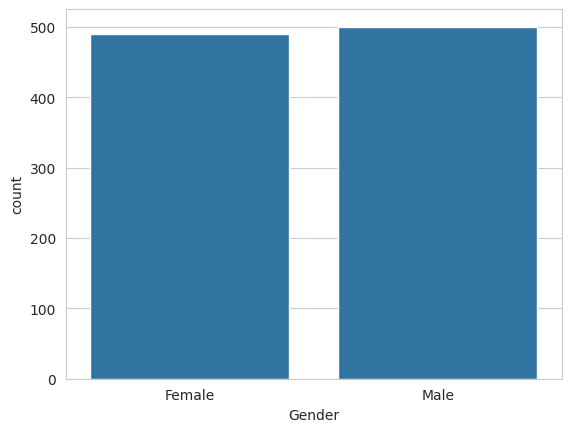

In [48]:
sns.countplot(x='Gender',data=dataset)
plt.show()

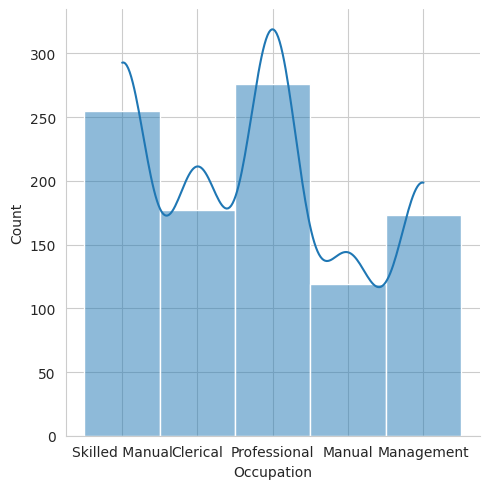

In [49]:
sns.displot(dataset['Occupation'],kde=True)
plt.show()

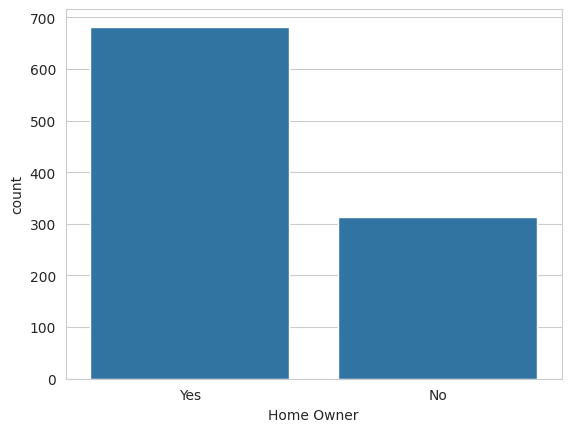

In [50]:
sns.countplot(x='Home Owner',data=dataset)
plt.show()

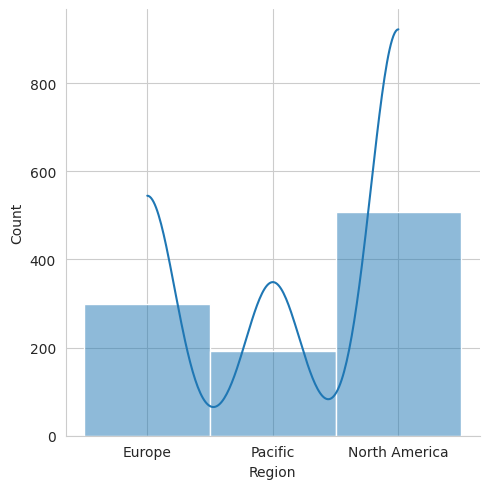

In [51]:
sns.displot(dataset['Region'],kde=True)
plt.show()

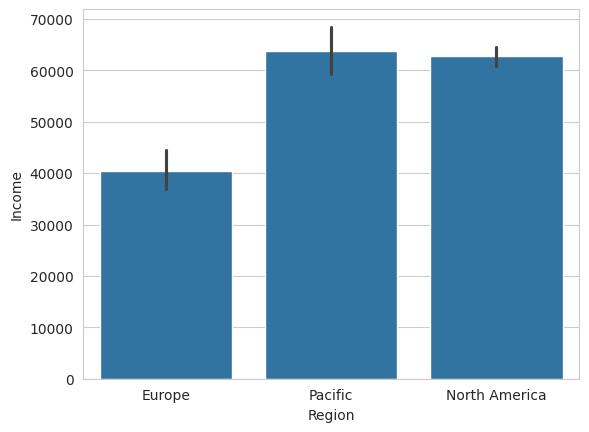

In [52]:
sns.barplot(x='Region',y='Income',data=dataset)
plt.show()

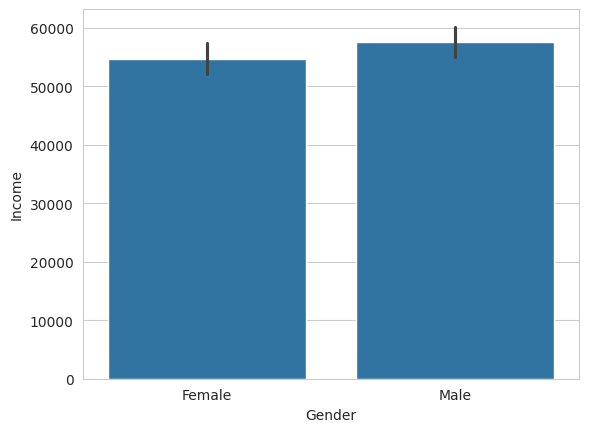

In [53]:
sns.barplot(x='Gender',y='Income',data=dataset)
plt.show()

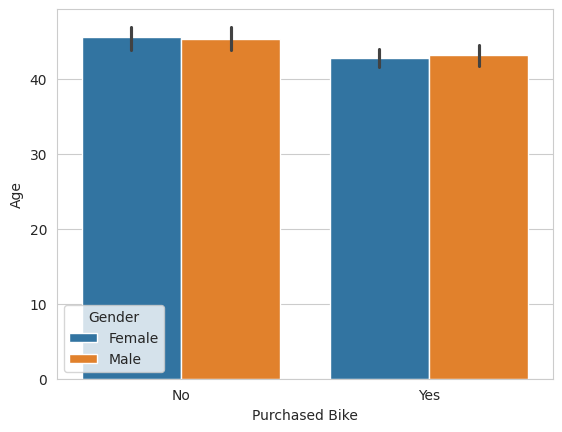

In [55]:
sns.barplot(x='Purchased Bike',y='Age',data=dataset,hue='Gender')
plt.show()

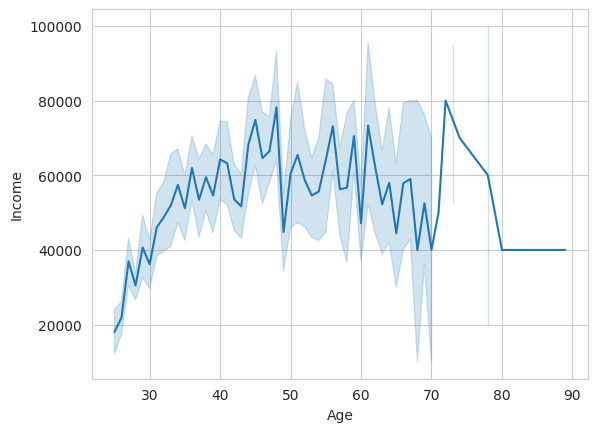

In [56]:
sns.lineplot(x='Age',y='Income',data=dataset)
plt.show()

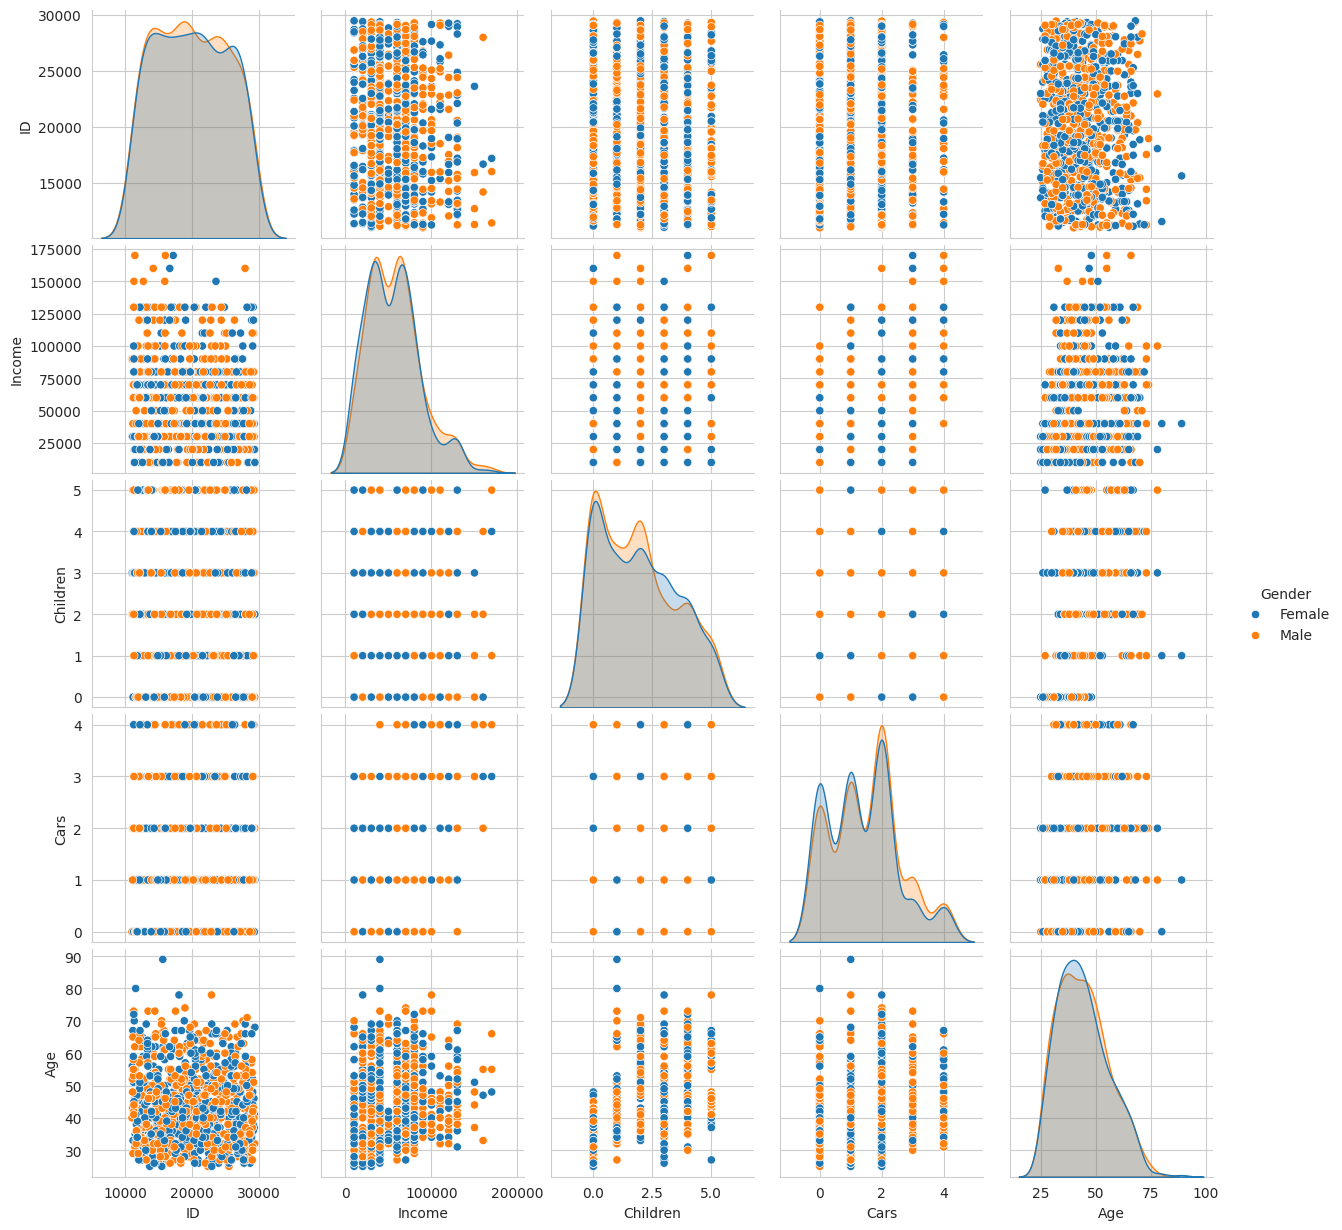

In [57]:
sns.pairplot(data=dataset,hue='Gender')
plt.show()

**Dataset Preprocessing**

In [15]:
# Split the Dataset into Dependent and Independent
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

# Display the Shape of the X & Y
print(f"Here is the Shape of the X : {X.shape}")
print(f"Here is the Shape of the Y : {Y.shape}")

Here is the Shape of the X : (1000, 12)
Here is the Shape of the Y : (1000,)


In [16]:
# Display the First Row Data from X & Y
print(X[0] , Y[0])

[12496 'Married' 'Female' 40000.0 1.0 'Bachelors' 'Skilled Manual' 'Yes'
 0.0 '0-1 Miles' 'Europe' 42.0] No


`Handle Missing Values`

In [17]:
# Handle the Numerical Data

# Define the Colm Index f(or the Handle of Numerical Type Missing Data)
numericalDataColm = [3 , 4 , 8 , 11]

# Create the Object of SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
X[:,numericalDataColm] = imputer.fit_transform(X[: , numericalDataColm])

In [18]:
# Handle the Categorical Data

# Define the Colm Index f(or the Handle of Categorical Type Missing Data)
categoricalDataColm = [1 , 2 , 7]

# Create the Object of SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = "most_frequent")
X[: , categoricalDataColm] = imputer.fit_transform(X[: , categoricalDataColm])

In [19]:
# Check the Missing Values after handled
dataframe1     = pd.DataFrame(X , columns = [name for name in columns[:-1]])
handledMissing = dataframe1.isnull().sum()
print(f"Here is the Count of Missing Values in the Dataset :\n{handledMissing}")

Here is the Count of Missing Values in the Dataset :
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
dtype: int64


`Handle Categorical Data`

In [20]:
# Handle the Categorical Data -> MEAN (Convert the Categorical Data into Numerical Data)

# Define the All Categorcial Data index
categoricalDataIndex = [1 , 2 , 5 , 6 , 7 , 9 , 10]

# Create the Object of LabelEncoder
labelEncoder = LabelEncoder()
for index in categoricalDataIndex:
  X[: , index] = labelEncoder.fit_transform(X[: , index])

Y = labelEncoder.fit_transform(Y)

# Display the First Data
print(X[0] , Y[0])

[12496 0 0 40000.0 1.0 0 4 1 0.0 0 0 42.0] 0


`Normalize the Data`

In [21]:
# Handle the Data Range

# Create the Object for MinMaxScaler [0,1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Display the First Data
print(X[0])

[0.0810972 0.        0.        0.1875    0.2       0.        1.
 1.        0.        0.        0.        0.265625 ]


**Splitting Dataset into Training & Testing**

In [22]:
# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Machine Learning Models**

`Logistic Regression`

In [24]:
# Create the Object of Logistic Regression
logistic_regression_model = LogisticRegression()

# Fit the Model in the Training Dataset
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Predict the Model in the Testing Dataset
logistic_regression_y_pred = logistic_regression_model.predict(X_test)

# Calculate the Accuracy Score
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)

# Display the Accuracy Score for the Logistic Regression
print(f"Linear Regression Accuracy {logistic_regression_accuracy}")

Linear Regression Accuracy 0.59


`Decision Tree`

In [29]:
# Create the Object of Decision Tree Model
decision_tree_model = DecisionTreeClassifier()

# Fit the Model in the Training Datset
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Predict the Model in the Testing Dataset
decision_tree_y_pred = decision_tree_model.predict(X_test)

# Calculate the Accuracy Score
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)

# Display the Accuracy Score of Decision Tree Model
print(f"Decision Tree Accuracy {decision_tree_accuracy}")

Decision Tree Accuracy 0.6366666666666667
